In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [6]:
gold_data=pd.read_csv('gld_price_data.csv')

In [7]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [8]:
gold_data.shape

(2290, 6)

In [9]:
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [10]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [13]:
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [14]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [15]:
gold_data.corr()

C:\Users\sai ashrith\AppData\Local\Temp\ipykernel_28068\2460967644.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  gold_data.corr()


,SPX,GLD,USO,SLV,EUR/USD
SPX,1.000000,0.049345,-0.591573,-0.274055,-0.672017
GLD,0.049345,1.000000,-0.186360,0.866632,-0.024375
USO,-0.591573,-0.186360,1.000000,0.167547,0.829317
SLV,-0.274055,0.866632,0.167547,1.000000,0.321631
EUR/USD,-0.672017,-0.024375,0.829317,0.321631,1.000000


In [25]:
plt.figure(figsize=(8,8))
correlation = gold_data.corr()

C:\Users\sai ashrith\AppData\Local\Temp\ipykernel_28068\2017675168.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = gold_data.corr()


<Figure size 800x800 with 0 Axes>

<Axes: >

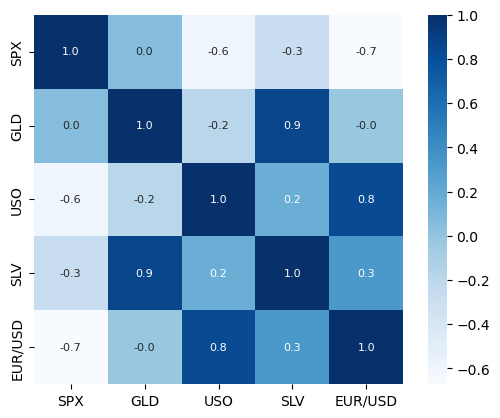

In [24]:
sns.heatmap(correlation,cbar=True,annot=True,square=True,fmt='.1f',annot_kws={'size':8},cmap='Blues')

In [26]:
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


C:\Users\sai ashrith\AppData\Local\Temp\ipykernel_28068\313706071.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'],color='blue')


<Axes: xlabel='GLD', ylabel='Density'>

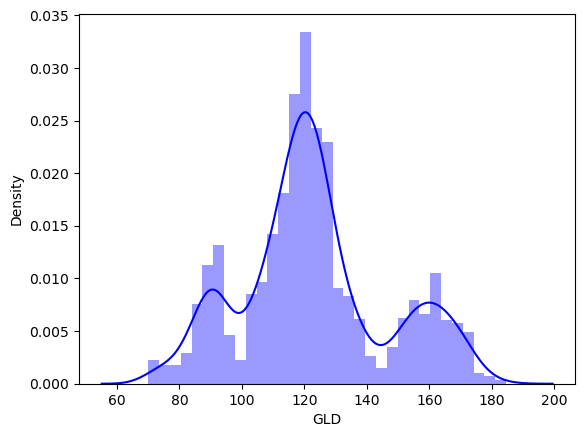

In [27]:
sns.distplot(gold_data['GLD'],color='blue')

In [28]:
X=gold_data.drop(['Date','GLD'],axis=1)
y=gold_data['GLD']

In [29]:
X.shape

(2290, 4)

In [31]:
y.shape

(2290,)

In [32]:
X

,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.1800,1.471692
1,1447.160034,78.370003,15.2850,1.474491
2,1411.630005,77.309998,15.1670,1.475492
3,1416.180054,75.500000,15.0530,1.468299
4,1390.189941,76.059998,15.5900,1.557099
...,...,...,...,...
2285,2671.919922,14.060000,15.5100,1.186789
2286,2697.790039,14.370000,15.5300,1.184722
2287,2723.070068,14.410000,15.7400,1.191753
2288,2730.129883,14.380000,15.5600,1.193118


In [33]:
y

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64

In [34]:
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [36]:
reg=RandomForestRegressor(n_estimators=100)

In [37]:
reg.fit(X_train,Y_train)

RandomForestRegressor()

In [38]:
pred=reg.predict(X_test)

In [39]:
pred

array([168.50149908,  82.28839963, 115.92890028, 127.66800093,
       120.75910143, 154.66929777, 150.1449983 , 125.89650049,
       117.43769894, 126.00250094, 116.61400093, 171.6578009 ,
       141.51089851, 167.640299  , 115.2546999 , 117.33020051,
       138.47680253, 170.13880087, 158.88420236, 160.20159906,
       155.07280023, 125.24870008, 174.91669886, 156.9280034 ,
       125.14070071,  93.87329992,  77.49860029, 120.60270027,
       119.0926993 , 167.57829965,  88.09270028, 125.05200009,
        91.20230078, 117.5675002 , 121.20849918, 136.2687006 ,
       115.48540076, 115.47520099, 148.65519914, 107.16770087,
       104.79740262,  87.21449786, 126.52900051, 118.00899984,
       153.77279943, 119.42030032, 108.37999992, 107.94609804,
        93.20620081, 126.98949845,  74.81090054, 113.60389897,
       121.24080008, 111.21479897, 118.94069886, 120.88779924,
       159.75170007, 170.12090047, 147.11289702,  85.70299869,
        94.31310021,  86.81549879,  90.61700025, 118.76

In [52]:
print(metrics.r2_score(Y_test,pred))



0.9895935970623623


In [50]:
import sklearn
dir(sklearn.metrics)

['ConfusionMatrixDisplay',
 'DetCurveDisplay',
 'DistanceMetric',
 'PrecisionRecallDisplay',
 'PredictionErrorDisplay',
 'RocCurveDisplay',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_base',
 '_classification',
 '_dist_metrics',
 '_pairwise_distances_reduction',
 '_pairwise_fast',
 '_plot',
 '_ranking',
 '_regression',
 '_scorer',
 'accuracy_score',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'auc',
 'average_precision_score',
 'balanced_accuracy_score',
 'brier_score_loss',
 'calinski_harabasz_score',
 'check_scoring',
 'class_likelihood_ratios',
 'classification_report',
 'cluster',
 'cohen_kappa_score',
 'completeness_score',
 'confusion_matrix',
 'consensus_score',
 'coverage_error',
 'd2_absolute_error_score',
 'd2_pinball_score',
 'd2_tweedie_score',
 'davies_bouldin_score',
 'dcg_score',
 'det_curve',
 'euclidean_distances',
 'explained_variance_score',
 'f1_score',
 'fb

In [53]:
Y_test=list(Y_test)

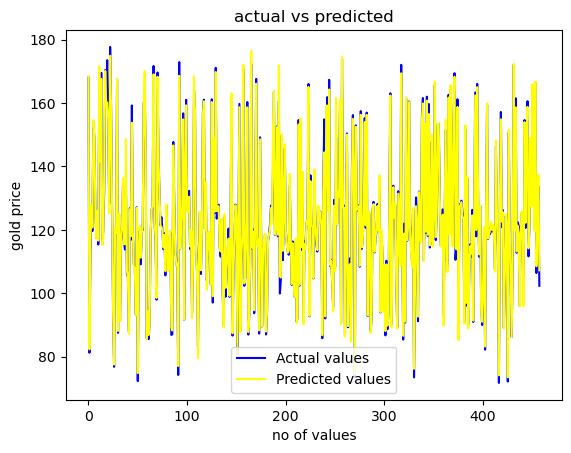

In [54]:
plt.plot(Y_test,color='blue',label='Actual values')
plt.plot(pred,color='yellow',label='Predicted values')
plt.title('actual vs predicted')
plt.xlabel('no of values')
plt.ylabel('gold price')
plt.legend()
plt.show()